In [1]:
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import numpy as np
import keras
from keras import backend as K
from keras.layers import Input, Dense, Conv2D, MaxPooling2D,\
        UpSampling2D, Lambda, Activation, merge, AveragePooling2D, \
        GlobalAveragePooling2D
from keras.layers.core import Dropout, Reshape, Flatten
from keras.layers.merge import Concatenate
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import Initializer
from keras.regularizers import l2
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
import pydot
import graphviz
from PIL import Image
import scipy.misc
import matplotlib.pyplot as plt
from scipy.misc import imsave
import bcolz
import math

Using TensorFlow backend.


In [2]:
'''LOAD CIFAR10'''
(x_all, y_all), (x_test, y_test) = cifar10.load_data()
x_all = x_all/255.0
x_test = x_test/255.0

x_train = x_all[:40000]
y_train = y_all[:40000]
x_validate = x_all[40000:]
y_validate = y_all[40000:]

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_validate = to_categorical(y_validate, num_classes)
y_test = to_categorical(y_test, num_classes)

input_shape = x_train.shape
x_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 10))

## Define and Train Classifier, Freeze Classifier After Training

In [3]:
classifier_inp = Input(x_train.shape[1:])
conv1 = Conv2D(32, (3, 3), padding='same')(classifier_inp)
conv1 = Activation('relu')(conv1)
conv2 = Conv2D(32, (3, 3))(conv1)
conv2 = Activation('relu')(conv2)
conv2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv2 = Dropout(0.25)(conv2)

conv3 = Conv2D(64, (3, 3), padding='same')(conv2)
conv3 = Activation('relu')(conv3)
conv4 = Conv2D(64, (3, 3))(conv3)
conv4 = Activation('relu')(conv4)
conv4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv4 = Dropout(0.25)(conv4)

classifier = Flatten()(conv4)
classifier = Dense(512)(classifier)
classifier = Activation('relu')(classifier)
classifier = Dropout(0.5)(classifier)
classifier = Dense(num_classes)(classifier)
classifier = Activation('softmax')(classifier)

classifier = Model(classifier_inp,classifier)

In [4]:
classifier.compile(Adam(),
                   loss = 'categorical_crossentropy',
                   metrics=['accuracy'])

In [6]:
classifier.optimizer = Adam(0.00001)
classifier.fit(x_train, y_train,
          batch_size = 512,
          epochs = 3000,
          verbose = 1,
          validation_data = (x_validate, y_validate))

Train on 40000 samples, validate on 10000 samples
Epoch 1/3000
40000/40000 [==============================] - 2s - loss: 0.1556 - acc: 0.9441 - val_loss: 0.8075 - val_acc: 0.7789
Epoch 2/3000
40000/40000 [==============================] - 2s - loss: 0.1566 - acc: 0.9447 - val_loss: 0.8205 - val_acc: 0.7757
Epoch 3/3000
40000/40000 [==============================] - 2s - loss: 0.1520 - acc: 0.9470 - val_loss: 0.8283 - val_acc: 0.7777
Epoch 4/3000
40000/40000 [==============================] - 2s - loss: 0.1523 - acc: 0.9466 - val_loss: 0.8158 - val_acc: 0.7782
Epoch 5/3000
40000/40000 [==============================] - 2s - loss: 0.1569 - acc: 0.9447 - val_loss: 0.8241 - val_acc: 0.7778
Epoch 6/3000
40000/40000 [==============================] - 2s - loss: 0.1541 - acc: 0.9448 - val_loss: 0.8219 - val_acc: 0.7776
Epoch 7/3000
40000/40000 [==============================] - 2s - loss: 0.1507 - acc: 0.9466 - val_loss: 0.8271 - val_acc: 0.7784
Epoch 8/3000
40000/40000 [=====================

40000/40000 [==============================] - 2s - loss: 0.1209 - acc: 0.9580 - val_loss: 0.8635 - val_acc: 0.7797
Epoch 64/3000
40000/40000 [==============================] - 2s - loss: 0.1266 - acc: 0.9562 - val_loss: 0.8607 - val_acc: 0.7791
Epoch 65/3000
40000/40000 [==============================] - 2s - loss: 0.1273 - acc: 0.9548 - val_loss: 0.8567 - val_acc: 0.7800
Epoch 66/3000
40000/40000 [==============================] - 2s - loss: 0.1285 - acc: 0.9541 - val_loss: 0.8577 - val_acc: 0.7774
Epoch 67/3000
40000/40000 [==============================] - 2s - loss: 0.1218 - acc: 0.9583 - val_loss: 0.8596 - val_acc: 0.7792
Epoch 68/3000
40000/40000 [==============================] - 2s - loss: 0.1231 - acc: 0.9571 - val_loss: 0.8755 - val_acc: 0.7783
Epoch 69/3000
40000/40000 [==============================] - 2s - loss: 0.1230 - acc: 0.9568 - val_loss: 0.8478 - val_acc: 0.7812
Epoch 70/3000
40000/40000 [==============================] - 2s - loss: 0.1236 - acc: 0.9572 - val_loss:

40000/40000 [==============================] - 2s - loss: 0.1059 - acc: 0.9630 - val_loss: 0.8866 - val_acc: 0.7793
Epoch 126/3000
40000/40000 [==============================] - 2s - loss: 0.1100 - acc: 0.9609 - val_loss: 0.8822 - val_acc: 0.7812
Epoch 127/3000
40000/40000 [==============================] - 2s - loss: 0.1063 - acc: 0.9625 - val_loss: 0.8886 - val_acc: 0.7807
Epoch 128/3000
40000/40000 [==============================] - 2s - loss: 0.1073 - acc: 0.9624 - val_loss: 0.8958 - val_acc: 0.7788
Epoch 129/3000
40000/40000 [==============================] - 2s - loss: 0.1107 - acc: 0.9614 - val_loss: 0.8674 - val_acc: 0.7799
Epoch 130/3000
40000/40000 [==============================] - 2s - loss: 0.1078 - acc: 0.9624 - val_loss: 0.8805 - val_acc: 0.7807
Epoch 131/3000
40000/40000 [==============================] - 2s - loss: 0.1102 - acc: 0.9615 - val_loss: 0.8769 - val_acc: 0.7802
Epoch 132/3000
40000/40000 [==============================] - 2s - loss: 0.1056 - acc: 0.9634 - va

KeyboardInterrupt: 

In [7]:
classifier_accuracy = classifier.evaluate(x_test, y_test, verbose=0)
print('Classifier accuracy: %.2f%%' % (classifier_accuracy[1] * 100.0))

Classifier accuracy: 77.61%


In [8]:
'''Make our classifier not trainable'''
classifier.trainable = False
for layer in classifier.layers:
    layer.trainable = False

## Define Generative Model and Train It

In [9]:
'''Prepare perception target - Functional'''
percept = Model(classifier_inp,conv2)

In [10]:
percept_train = percept.predict(x_train)
percept_validate = percept.predict(x_validate)

percept_train.shape, percept_validate.shape

((40000, 15, 15, 32), (10000, 15, 15, 32))

In [11]:
'''Prepare adversarial target'''
y0_train = np.zeros((x_train.shape[0],10))
y0_train[:,0] = 1.0
y0_validate = np.zeros((x_validate.shape[0],10))
y0_validate[:,0] = 1.0

y1_train = np.zeros((x_train.shape[0],10))
y1_train[:,1] = 1.0
y1_validate = np.zeros((x_validate.shape[0],10))
y1_validate[:,1] = 1.0

y2_train = np.zeros((x_train.shape[0],10))
y2_train[:,2] = 1.0
y2_validate = np.zeros((x_validate.shape[0],10))
y2_validate[:,2] = 1.0

y3_train = np.zeros((x_train.shape[0],10))
y3_train[:,3] = 1.0
y3_validate = np.zeros((x_validate.shape[0],10))
y3_validate[:,3] = 1.0

y4_train = np.zeros((x_train.shape[0],10))
y4_train[:,4] = 1.0
y4_validate = np.zeros((x_validate.shape[0],10))
y4_validate[:,4] = 1.0

y5_train = np.zeros((x_train.shape[0],10))
y5_train[:,5] = 1.0
y5_validate = np.zeros((x_validate.shape[0],10))
y5_validate[:,5] = 1.0

y6_train = np.zeros((x_train.shape[0],10))
y6_train[:,6] = 1.0
y6_validate = np.zeros((x_validate.shape[0],10))
y6_validate[:,6] = 1.0

y7_train = np.zeros((x_train.shape[0],10))
y7_train[:,7] = 1.0
y7_validate = np.zeros((x_validate.shape[0],10))
y7_validate[:,7] = 1.0

y8_train = np.zeros((x_train.shape[0],10))
y8_train[:,8] = 1.0
y8_validate = np.zeros((x_validate.shape[0],10))
y8_validate[:,8] = 1.0

y9_train = np.zeros((x_train.shape[0],10))
y9_train[:,9] = 1.0
y9_validate = np.zeros((x_validate.shape[0],10))
y9_validate[:,9] = 1.0

In [12]:
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, (size,size), strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = Activation('relu')(x)
    return x

def residual_block(blockInput, num_filters=64):
    x = convolution_block(blockInput, num_filters, 3)
    x = convolution_block(x, num_filters, 3, activation=False)
    x = merge([x, blockInput], mode='sum')
    return x

def upsampling_block(x, filters, size):
    x = UpSampling2D()(x)
    x = Conv2D(filters, (size,size), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

In [13]:
classifier.trainable = False
for layer in classifier.layers:
    layer.trainable = False
    
percept.trainable = False
for layer in percept.layers:
    percept.trainable = False

'''NETWORK #0'''
inp0 = Input(x_train.shape[1:])
x0 = convolution_block(inp0, 64, 9)
x0 = residual_block(x0)
x0 = residual_block(x0)
x0 = residual_block(x0)
x0 = residual_block(x0)
out0 = Conv2D(3, (9,9), activation = 'sigmoid', padding='same')(x0)
percept0 = percept(out0)
y0 = classifier(out0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [14]:
model0 = Model(inp0, [percept0, y0])

In [15]:
model0.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 32, 32, 3)     0                                            
____________________________________________________________________________________________________
conv2d_5 (Conv2D)                (None, 32, 32, 64)    15616       input_2[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 32, 32, 64)    256         conv2d_5[0][0]                   
____________________________________________________________________________________________________
activation_7 (Activation)        (None, 32, 32, 64)    0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [ ]:
plot_model(model0, to_file='model0.png')

In [16]:
model0.compile(Adam(), 
            loss = {'model_2': 'mean_squared_error', 'model_1': 'categorical_crossentropy'},
            loss_weights = {'model_2': 250.0, 'model_1': 1.0}) #model_2 = perception, model_1 = classifier

In [17]:
model0.optimizer = Adam(0.00001)
model0.loss_weights = {'model_2': 250.0, 'model_1': 1.0} #model_2 = perception, model_1 = classifier
model0.fit(x_train, {'model_2': percept_train, 'model_1':y0_train}, 
        validation_data = (x_validate, {'model_2': percept_validate,'model_1': y0_validate}),
        epochs = 2000,
        batch_size = 512,
        shuffle = True,
        #callbacks = [model0_loss]
       )

Train on 40000 samples, validate on 10000 samples
Epoch 1/2000
40000/40000 [==============================] - 32s - loss: 49.9599 - model_2_loss: 0.1519 - model_1_loss: 11.9745 - val_loss: 21.5352 - val_model_2_loss: 0.0548 - val_model_1_loss: 7.8408
Epoch 2/2000
40000/40000 [==============================] - 31s - loss: 29.1586 - model_2_loss: 0.0820 - model_1_loss: 8.6535 - val_loss: 22.1664 - val_model_2_loss: 0.0596 - val_model_1_loss: 7.2712
Epoch 3/2000
40000/40000 [==============================] - 32s - loss: 26.1109 - model_2_loss: 0.0747 - model_1_loss: 7.4455 - val_loss: 20.9612 - val_model_2_loss: 0.0580 - val_model_1_loss: 6.4563
Epoch 4/2000
40000/40000 [==============================] - 32s - loss: 24.1866 - model_2_loss: 0.0710 - model_1_loss: 6.4388 - val_loss: 18.7704 - val_model_2_loss: 0.0522 - val_model_1_loss: 5.7247
Epoch 5/2000
40000/40000 [==============================] - 32s - loss: 22.5176 - model_2_loss: 0.0682 - model_1_loss: 5.4617 - val_loss: 16.3254 - v

40000/40000 [==============================] - 32s - loss: 9.7114 - model_2_loss: 0.0345 - model_1_loss: 1.0915 - val_loss: 5.8685 - val_model_2_loss: 0.0207 - val_model_1_loss: 0.6983
Epoch 42/2000
40000/40000 [==============================] - 32s - loss: 9.6744 - model_2_loss: 0.0344 - model_1_loss: 1.0844 - val_loss: 5.8022 - val_model_2_loss: 0.0205 - val_model_1_loss: 0.6709
Epoch 43/2000
40000/40000 [==============================] - 31s - loss: 9.6350 - model_2_loss: 0.0343 - model_1_loss: 1.0682 - val_loss: 5.7760 - val_model_2_loss: 0.0204 - val_model_1_loss: 0.6855
Epoch 44/2000
40000/40000 [==============================] - 31s - loss: 9.6086 - model_2_loss: 0.0342 - model_1_loss: 1.0627 - val_loss: 5.8067 - val_model_2_loss: 0.0205 - val_model_1_loss: 0.6840
Epoch 45/2000
40000/40000 [==============================] - 32s - loss: 9.5845 - model_2_loss: 0.0341 - model_1_loss: 1.0644 - val_loss: 5.9529 - val_model_2_loss: 0.0210 - val_model_1_loss: 0.7147
Epoch 46/2000
40000

40000/40000 [==============================] - 32s - loss: 8.9231 - model_2_loss: 0.0320 - model_1_loss: 0.9194 - val_loss: 5.2583 - val_model_2_loss: 0.0187 - val_model_1_loss: 0.5805
Epoch 83/2000
40000/40000 [==============================] - 32s - loss: 8.9171 - model_2_loss: 0.0320 - model_1_loss: 0.9064 - val_loss: 5.1930 - val_model_2_loss: 0.0185 - val_model_1_loss: 0.5591
Epoch 84/2000
40000/40000 [==============================] - 32s - loss: 8.9049 - model_2_loss: 0.0319 - model_1_loss: 0.9179 - val_loss: 5.3332 - val_model_2_loss: 0.0189 - val_model_1_loss: 0.6098
Epoch 85/2000
40000/40000 [==============================] - 32s - loss: 8.8923 - model_2_loss: 0.0319 - model_1_loss: 0.9099 - val_loss: 5.1674 - val_model_2_loss: 0.0184 - val_model_1_loss: 0.5691
Epoch 86/2000
40000/40000 [==============================] - 32s - loss: 8.8852 - model_2_loss: 0.0319 - model_1_loss: 0.9123 - val_loss: 5.1235 - val_model_2_loss: 0.0184 - val_model_1_loss: 0.5347
Epoch 87/2000
40000

40000/40000 [==============================] - 32s - loss: 8.5888 - model_2_loss: 0.0311 - model_1_loss: 0.8136 - val_loss: 4.8213 - val_model_2_loss: 0.0174 - val_model_1_loss: 0.4776
Epoch 124/2000
40000/40000 [==============================] - 32s - loss: 8.5750 - model_2_loss: 0.0311 - model_1_loss: 0.8086 - val_loss: 4.8067 - val_model_2_loss: 0.0173 - val_model_1_loss: 0.4904
Epoch 125/2000
40000/40000 [==============================] - 32s - loss: 8.5773 - model_2_loss: 0.0310 - model_1_loss: 0.8169 - val_loss: 4.9855 - val_model_2_loss: 0.0180 - val_model_1_loss: 0.4788
Epoch 126/2000
40000/40000 [==============================] - 32s - loss: 8.5620 - model_2_loss: 0.0310 - model_1_loss: 0.8011 - val_loss: 4.8362 - val_model_2_loss: 0.0175 - val_model_1_loss: 0.4713
Epoch 127/2000
40000/40000 [==============================] - 32s - loss: 8.5607 - model_2_loss: 0.0310 - model_1_loss: 0.8034 - val_loss: 4.8505 - val_model_2_loss: 0.0175 - val_model_1_loss: 0.4633
Epoch 128/2000


40000/40000 [==============================] - 32s - loss: 8.3900 - model_2_loss: 0.0306 - model_1_loss: 0.7522 - val_loss: 4.6704 - val_model_2_loss: 0.0169 - val_model_1_loss: 0.4473
Epoch 165/2000
40000/40000 [==============================] - 32s - loss: 8.3699 - model_2_loss: 0.0305 - model_1_loss: 0.7500 - val_loss: 4.6635 - val_model_2_loss: 0.0168 - val_model_1_loss: 0.4623
Epoch 166/2000
40000/40000 [==============================] - 32s - loss: 8.3774 - model_2_loss: 0.0305 - model_1_loss: 0.7483 - val_loss: 4.6796 - val_model_2_loss: 0.0169 - val_model_1_loss: 0.4433
Epoch 167/2000
40000/40000 [==============================] - 32s - loss: 8.3742 - model_2_loss: 0.0305 - model_1_loss: 0.7428 - val_loss: 4.6252 - val_model_2_loss: 0.0168 - val_model_1_loss: 0.4237
Epoch 168/2000
40000/40000 [==============================] - 32s - loss: 8.3641 - model_2_loss: 0.0305 - model_1_loss: 0.7468 - val_loss: 4.6270 - val_model_2_loss: 0.0167 - val_model_1_loss: 0.4544
Epoch 169/2000


40000/40000 [==============================] - 32s - loss: 8.2427 - model_2_loss: 0.0302 - model_1_loss: 0.7022 - val_loss: 4.5256 - val_model_2_loss: 0.0164 - val_model_1_loss: 0.4285
Epoch 206/2000
40000/40000 [==============================] - 32s - loss: 8.2464 - model_2_loss: 0.0302 - model_1_loss: 0.7010 - val_loss: 4.5318 - val_model_2_loss: 0.0164 - val_model_1_loss: 0.4220
Epoch 207/2000
40000/40000 [==============================] - 32s - loss: 8.2397 - model_2_loss: 0.0301 - model_1_loss: 0.7034 - val_loss: 4.5418 - val_model_2_loss: 0.0165 - val_model_1_loss: 0.4114
Epoch 208/2000
40000/40000 [==============================] - 32s - loss: 8.2332 - model_2_loss: 0.0301 - model_1_loss: 0.6964 - val_loss: 4.5141 - val_model_2_loss: 0.0164 - val_model_1_loss: 0.4028
Epoch 209/2000
40000/40000 [==============================] - 32s - loss: 8.2360 - model_2_loss: 0.0302 - model_1_loss: 0.6948 - val_loss: 4.5910 - val_model_2_loss: 0.0166 - val_model_1_loss: 0.4432
Epoch 210/2000


40000/40000 [==============================] - 32s - loss: 8.1342 - model_2_loss: 0.0299 - model_1_loss: 0.6653 - val_loss: 4.4837 - val_model_2_loss: 0.0164 - val_model_1_loss: 0.3940
Epoch 247/2000
40000/40000 [==============================] - 32s - loss: 8.1464 - model_2_loss: 0.0299 - model_1_loss: 0.6743 - val_loss: 4.4403 - val_model_2_loss: 0.0161 - val_model_1_loss: 0.4043
Epoch 248/2000
40000/40000 [==============================] - 32s - loss: 8.1370 - model_2_loss: 0.0299 - model_1_loss: 0.6704 - val_loss: 4.5071 - val_model_2_loss: 0.0165 - val_model_1_loss: 0.3883
Epoch 249/2000
40000/40000 [==============================] - 32s - loss: 8.1405 - model_2_loss: 0.0299 - model_1_loss: 0.6732 - val_loss: 4.5292 - val_model_2_loss: 0.0166 - val_model_1_loss: 0.3731
Epoch 250/2000
40000/40000 [==============================] - 32s - loss: 8.1326 - model_2_loss: 0.0298 - model_1_loss: 0.6733 - val_loss: 4.4619 - val_model_2_loss: 0.0163 - val_model_1_loss: 0.3917
Epoch 251/2000


40000/40000 [==============================] - 32s - loss: 8.0635 - model_2_loss: 0.0297 - model_1_loss: 0.6467 - val_loss: 4.4136 - val_model_2_loss: 0.0161 - val_model_1_loss: 0.3794
Epoch 288/2000
40000/40000 [==============================] - 32s - loss: 8.0689 - model_2_loss: 0.0297 - model_1_loss: 0.6559 - val_loss: 4.2726 - val_model_2_loss: 0.0156 - val_model_1_loss: 0.3687
Epoch 289/2000
40000/40000 [==============================] - 31s - loss: 8.0642 - model_2_loss: 0.0296 - model_1_loss: 0.6557 - val_loss: 4.5083 - val_model_2_loss: 0.0165 - val_model_1_loss: 0.3915
Epoch 290/2000
40000/40000 [==============================] - 32s - loss: 8.0609 - model_2_loss: 0.0297 - model_1_loss: 0.6476 - val_loss: 4.3439 - val_model_2_loss: 0.0159 - val_model_1_loss: 0.3721
Epoch 291/2000
40000/40000 [==============================] - 32s - loss: 8.0642 - model_2_loss: 0.0296 - model_1_loss: 0.6583 - val_loss: 4.3105 - val_model_2_loss: 0.0159 - val_model_1_loss: 0.3440
Epoch 292/2000


40000/40000 [==============================] - 32s - loss: 8.0108 - model_2_loss: 0.0295 - model_1_loss: 0.6331 - val_loss: 4.2984 - val_model_2_loss: 0.0158 - val_model_1_loss: 0.3400
Epoch 329/2000
40000/40000 [==============================] - 31s - loss: 8.0015 - model_2_loss: 0.0295 - model_1_loss: 0.6296 - val_loss: 4.2563 - val_model_2_loss: 0.0155 - val_model_1_loss: 0.3718
Epoch 330/2000
40000/40000 [==============================] - 32s - loss: 8.0023 - model_2_loss: 0.0295 - model_1_loss: 0.6362 - val_loss: 4.3116 - val_model_2_loss: 0.0158 - val_model_1_loss: 0.3596
Epoch 331/2000
40000/40000 [==============================] - 32s - loss: 8.0097 - model_2_loss: 0.0295 - model_1_loss: 0.6364 - val_loss: 4.2694 - val_model_2_loss: 0.0156 - val_model_1_loss: 0.3606
Epoch 332/2000
40000/40000 [==============================] - 32s - loss: 7.9901 - model_2_loss: 0.0295 - model_1_loss: 0.6254 - val_loss: 4.2788 - val_model_2_loss: 0.0158 - val_model_1_loss: 0.3402
Epoch 333/2000


40000/40000 [==============================] - 32s - loss: 7.9482 - model_2_loss: 0.0293 - model_1_loss: 0.6144 - val_loss: 4.2205 - val_model_2_loss: 0.0155 - val_model_1_loss: 0.3346
Epoch 370/2000
40000/40000 [==============================] - 32s - loss: 7.9398 - model_2_loss: 0.0293 - model_1_loss: 0.6168 - val_loss: 4.1921 - val_model_2_loss: 0.0153 - val_model_1_loss: 0.3594
Epoch 371/2000
40000/40000 [==============================] - 31s - loss: 7.9343 - model_2_loss: 0.0293 - model_1_loss: 0.6102 - val_loss: 4.1663 - val_model_2_loss: 0.0153 - val_model_1_loss: 0.3386
Epoch 372/2000
40000/40000 [==============================] - 32s - loss: 7.9365 - model_2_loss: 0.0293 - model_1_loss: 0.6087 - val_loss: 4.1462 - val_model_2_loss: 0.0151 - val_model_1_loss: 0.3658
Epoch 373/2000
40000/40000 [==============================] - 32s - loss: 7.9395 - model_2_loss: 0.0293 - model_1_loss: 0.6198 - val_loss: 4.2326 - val_model_2_loss: 0.0155 - val_model_1_loss: 0.3487
Epoch 374/2000


40000/40000 [==============================] - 32s - loss: 7.8878 - model_2_loss: 0.0292 - model_1_loss: 0.5937 - val_loss: 4.1530 - val_model_2_loss: 0.0151 - val_model_1_loss: 0.3745
Epoch 411/2000
40000/40000 [==============================] - 32s - loss: 7.8809 - model_2_loss: 0.0291 - model_1_loss: 0.6003 - val_loss: 4.1467 - val_model_2_loss: 0.0152 - val_model_1_loss: 0.3499
Epoch 412/2000
40000/40000 [==============================] - 32s - loss: 7.8851 - model_2_loss: 0.0291 - model_1_loss: 0.6040 - val_loss: 4.1169 - val_model_2_loss: 0.0152 - val_model_1_loss: 0.3157
Epoch 413/2000
40000/40000 [==============================] - 32s - loss: 7.8942 - model_2_loss: 0.0292 - model_1_loss: 0.6011 - val_loss: 4.2044 - val_model_2_loss: 0.0155 - val_model_1_loss: 0.3356
Epoch 414/2000
40000/40000 [==============================] - 32s - loss: 7.8896 - model_2_loss: 0.0292 - model_1_loss: 0.5937 - val_loss: 4.2166 - val_model_2_loss: 0.0155 - val_model_1_loss: 0.3324
Epoch 415/2000


40000/40000 [==============================] - 32s - loss: 7.8498 - model_2_loss: 0.0291 - model_1_loss: 0.5867 - val_loss: 4.0875 - val_model_2_loss: 0.0151 - val_model_1_loss: 0.3242
Epoch 452/2000
40000/40000 [==============================] - 32s - loss: 7.8493 - model_2_loss: 0.0290 - model_1_loss: 0.5915 - val_loss: 4.1249 - val_model_2_loss: 0.0152 - val_model_1_loss: 0.3163
Epoch 453/2000
40000/40000 [==============================] - 31s - loss: 7.8438 - model_2_loss: 0.0290 - model_1_loss: 0.5883 - val_loss: 4.1119 - val_model_2_loss: 0.0152 - val_model_1_loss: 0.3135
Epoch 454/2000
40000/40000 [==============================] - 31s - loss: 7.8457 - model_2_loss: 0.0290 - model_1_loss: 0.5837 - val_loss: 4.0789 - val_model_2_loss: 0.0151 - val_model_1_loss: 0.3040
Epoch 455/2000
40000/40000 [==============================] - 32s - loss: 7.8476 - model_2_loss: 0.0290 - model_1_loss: 0.5864 - val_loss: 4.0913 - val_model_2_loss: 0.0152 - val_model_1_loss: 0.2986
Epoch 456/2000


KeyboardInterrupt: 

In [18]:
generator = Model(inp0, out0)

In [19]:
x_fake = generator.predict(x_test)
x_fake.shape

(10000, 32, 32, 3)

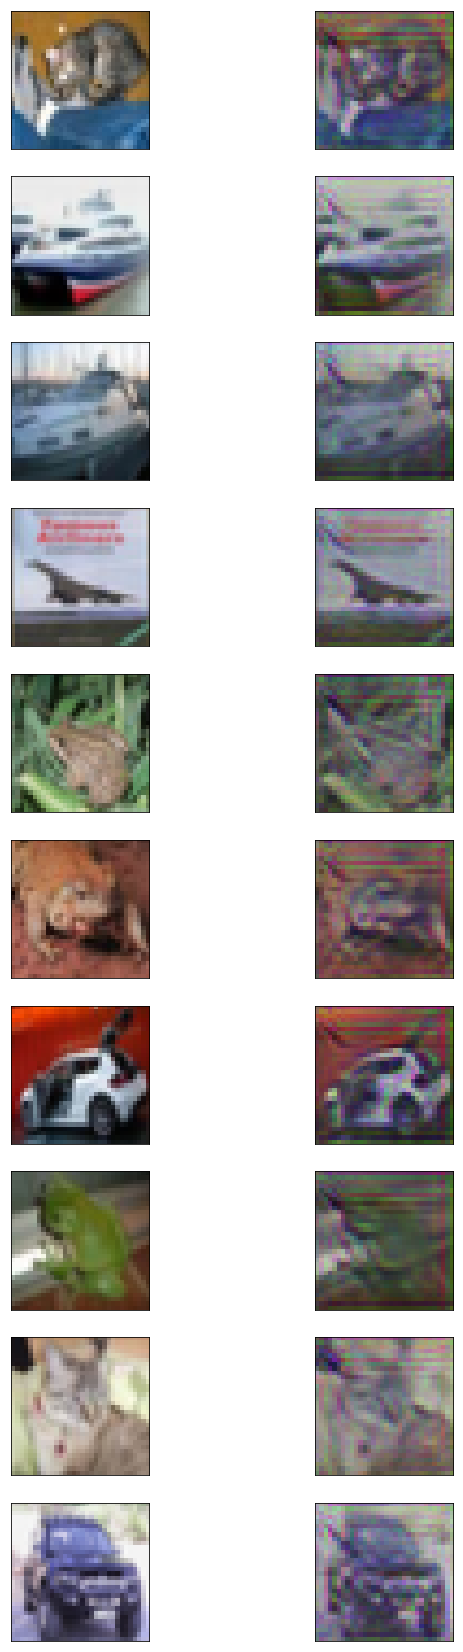

In [20]:
'''Lets see some of the generated examples'''
num = 10
fig,axis = plt.subplots(nrows = num, ncols=2, figsize=(10,30))
for i in range(num):
    axis[i,0].imshow(x_test[i])
    axis[i,0].get_xaxis().set_visible(False)
    axis[i,0].get_yaxis().set_visible(False)
    axis[i,1].imshow(x_fake[i])
    axis[i,1].get_xaxis().set_visible(False)
    axis[i,1].get_yaxis().set_visible(False)

In [21]:
classifier_accuracy_test = classifier.evaluate(x_test, y_test, verbose=0)
print('Classifier accuracy on test set: %.2f%%' % (classifier_accuracy_test[1] * 100.0))

Classifier accuracy on test set: 77.61%


In [22]:
classifier_accuracy_fake = classifier.evaluate(x_fake, y_test, verbose=0)
print('Classifier accuracy on fake test set: %.2f%%' % (classifier_accuracy_fake[1] * 100.0))

Classifier accuracy on fake test set: 17.57%


## Let's see how the classifier is fooled

In [27]:
labels = ['airplane', 'automobile', 'bird', 'cat',
         'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

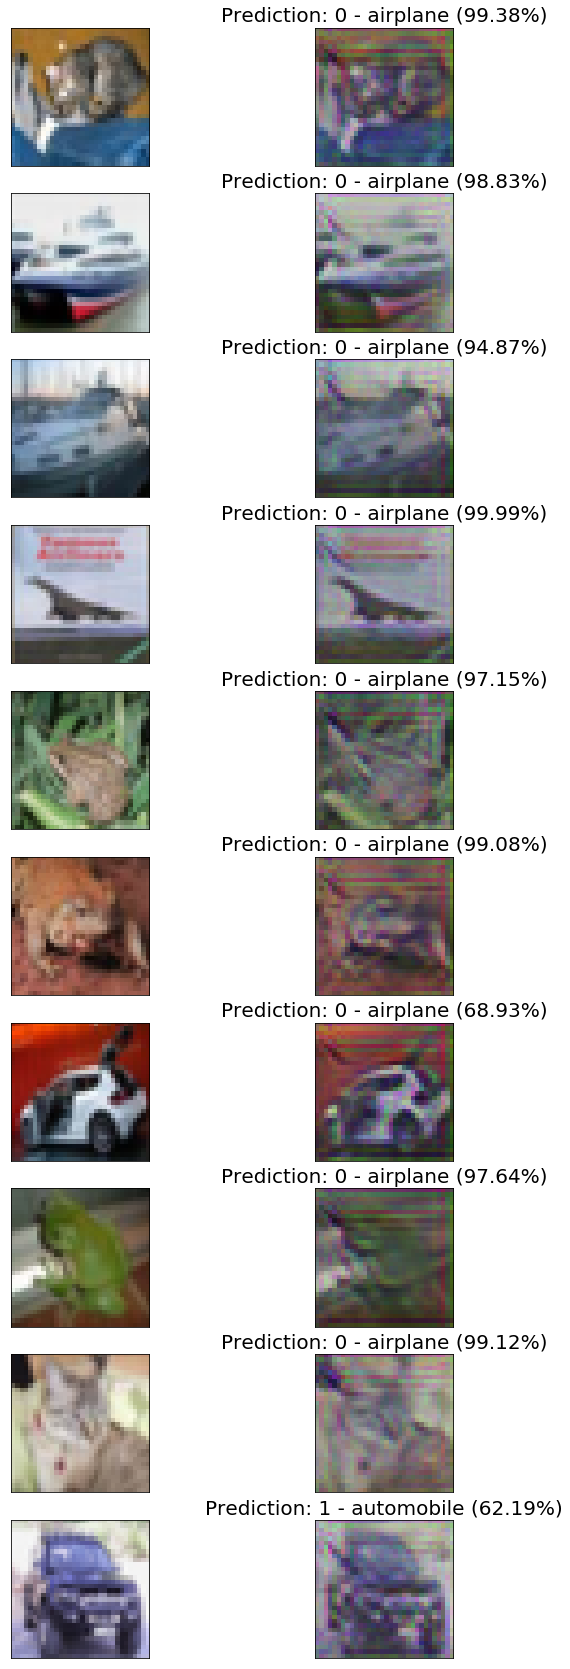

In [29]:
fake_predictions = classifier.predict(x_fake)
fig,axis = plt.subplots(nrows = num, ncols=2, figsize=(10,30))
for i in range(num):
    axis[i,0].imshow(x_test[i])
    axis[i,0].get_xaxis().set_visible(False)
    axis[i,0].get_yaxis().set_visible(False)
    axis[i,1].imshow(x_fake[i,])
    axis[i,1].get_xaxis().set_visible(False)
    axis[i,1].get_yaxis().set_visible(False)
    title = 'Prediction: ' + str(np.argmax(fake_predictions[i]))\
            + ' - ' + labels[np.argmax(fake_predictions[i])]\
            + ' (' +\
            '%.2f%%' % (np.amax(fake_predictions[i])*100.0)\
            + ')'
    axis[i,1].set_title(title, fontsize = 20)

In [ ]:
generator.save('generator_model.h5')
classifier.save('mnist_classifier_model.h5')